In [18]:
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utilities import create_directory
import os
import shutil

In [2]:
dataset = torch.load('face_embedding.pt')

/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


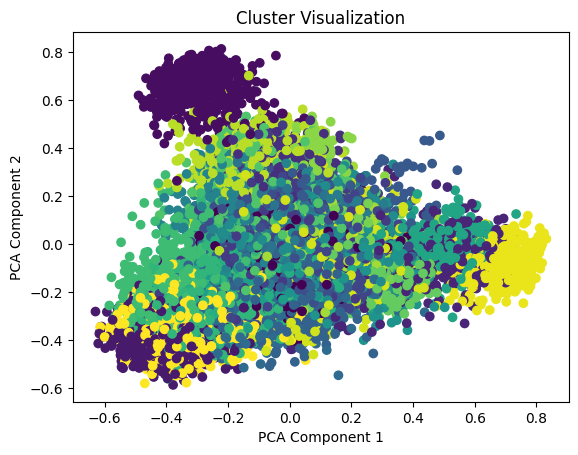

In [3]:
# Example tensor
tensor = dataset['x']

# Convert to NumPy array
numpy_array = tensor.numpy()

# Clustering
n_clusters = 30
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(numpy_array)

# Get Cluster Labels
cluster_labels = kmeans.labels_

# Optional: Visualization for 2D data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numpy_array)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [11]:
y = dataset['y']
labels = {label:[y[i] for i, l in enumerate(kmeans.labels_) if l == label] for label in set(kmeans.labels_)}

In [23]:
create_directory('faces-labels')
for k, v in labels.items():
    create_directory(os.path.join('faces-labels', str(k)), delete_if_exists=True)
    [shutil.copyfile(f, os.path.join('face-labels', str(k), f.split('/')[1])) for f in v]

['faces/Wedding-2220_7.png', 'faces/Wedding-2204_6.png', 'faces/Wedding-2166_5.png', 'faces/Wedding-2326_4.png', 'faces/Wedding-1890_2.png', 'faces/Wedding-1883_8.png', 'faces/Wedding-2160_3.png', 'faces/Wedding-1828_2.png', 'faces/Wedding-2159_7.png', 'faces/Wedding-1616_24.png', 'faces/Wedding-1804_10.png', 'faces/Wedding-1616_19.png', 'faces/Wedding-2261_2.png', 'faces/Wedding-1896_5.png', 'faces/Wedding-2164_6.png', 'faces/Wedding-1894_7.png', 'faces/Wedding-1976_7.png', 'faces/Wedding-1894_5.png', 'faces/Wedding-2164_4.png', 'faces/Wedding-1164_13.png', 'faces/Wedding-2010_17.png', 'faces/Wedding-2287_3.png', 'faces/Wedding-2281_5.png', 'faces/Wedding-1900_8.png', 'faces/Wedding-2025_5.png', 'faces/Wedding-2162_3.png', 'faces/Wedding-1881_8.png', 'faces/Wedding-2160_1.png', 'faces/Wedding-1961_8.png', 'faces/Wedding-2140_4.png', 'faces/Wedding-942_8.png', 'faces/Wedding-1894_4.png', 'faces/Wedding-1002_8.png', 'faces/Wedding-2220_5.png', 'faces/Wedding-2304_1.png', 'faces/Wedding-

Processing: 100%|██████████| 48/48 [05:46<00:00,  7.21s/it]


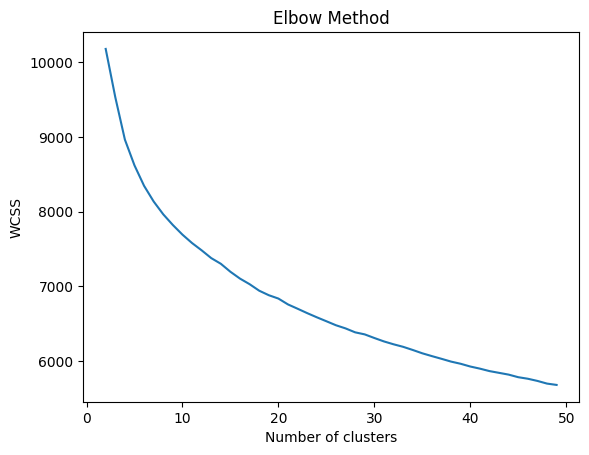

"\n# Silhouette Score\nsilhouette_avg = []\nfor n_clusters in range_n_clusters:\n    kmeans = KMeans(n_clusters=n_clusters, n_init=10)\n    cluster_labels = kmeans.fit_predict(numpy_array)\n    silhouette_avg.append(silhouette_score(numpy_array, cluster_labels))\n\nplt.plot(range_n_clusters, silhouette_avg)\nplt.title('Silhouette Score')\nplt.xlabel('Number of clusters')\nplt.ylabel('Average Silhouette Score')\nplt.show()\n"

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tqdm

# Assuming numpy_array is your data converted from the tensor
range_n_clusters = range(2, 50)  # Example range (from 2 to 9)
numpy_array = dataset['x'].numpy()

# Elbow Method
wcss = []
for n_clusters in tqdm.tqdm(range_n_clusters, desc='Processing', total=len(range_n_clusters)) :
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(numpy_array)
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

"""

"""


In [4]:
# Silhouette Score
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(numpy_array)
    silhouette_avg.append(silhouette_score(numpy_array, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
